# About the project 

Netflix is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents. This dataset is a cleaned version of the original version which can be found here. The data consist of contents added to Netflix from 2008 to 2021. The oldest content is as old as 1925 and the newest as 2021. This dataset will be cleaned with PostgreSQL and visualized with Tableau. The purpose of this dataset is to test my data cleaning and visualization skills. The cleaned data can be found below and the Tableau dashboard can be found here .
Data Cleaning

We are going to:

    Treat the Nulls
    Treat the duplicates
    Populate missing rows
    Drop unneeded columns
    Split columns
    Extra steps and more explanation on the process will be explained through the code comments
    
    link: https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization


# Data Reading and Exploration

we will discuss here the main info of the data between null and duplicates values and dropping unneeded columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Documents/netflix.csv")
data.shape

(8790, 10)

In [4]:
data.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
data.isnull().sum() # no null values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
data.duplicated().sum() # there are 3 duplicates
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()  # getting red of duplicated rows

0

In [9]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Sheet 1. Content type in percentage

In [111]:
 data["type"].value_counts(normalize = True)*100 # percent of type of shows 

Movie      69.692833
TV Show    30.307167
Name: type, dtype: float64

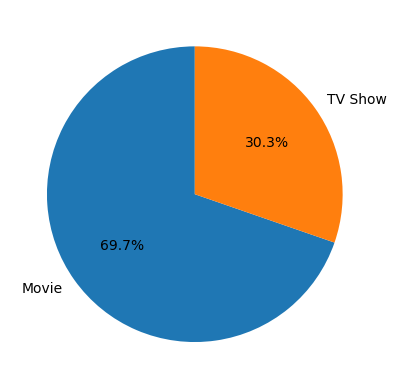

In [125]:
plt.pie(data["type"].value_counts(normalize = True).values, labels=data["type"].value_counts().index, 
        textprops=dict(color="black"), startangle=90, autopct='%1.1f%%');

## Sheet 2. Movie & TV Show by Country

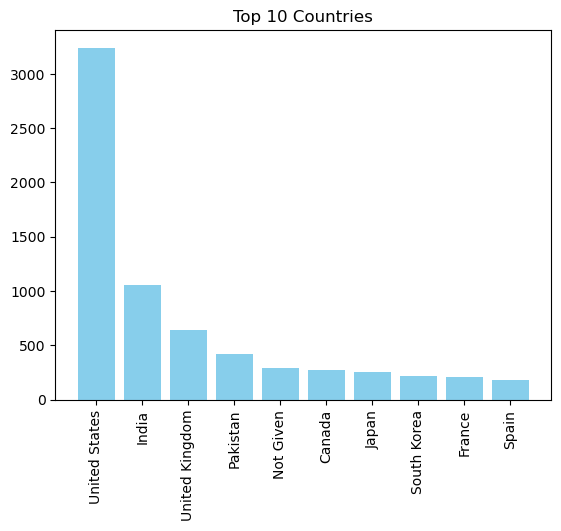

In [205]:
countries = data["country"].value_counts().reset_index(name = 'count').sort_values(by = "count", ascending = False)[:10]
plt.bar(countries["index"], countries["count"], color = "skyblue")
plt.xticks(rotation = 90)
plt.title("Top 10 Countries");

## Sheet 3. Number of Contents Added through the Years

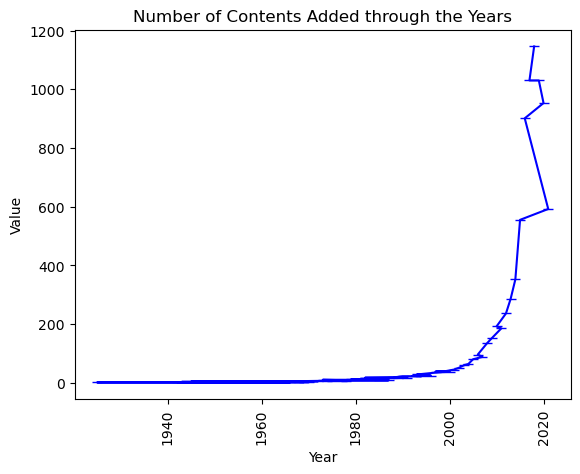

In [212]:
sh3 = data["release_year"].value_counts()
sh3.plot(kind = "line", color = 'blue', marker = '_', markersize = 7)
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.ylabel('Value')
plt.title("Number of Contents Added through the Years")
plt.show()

2018    1146
2019    1030
2017    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
2011     185
Name: release_year, dtype: int64


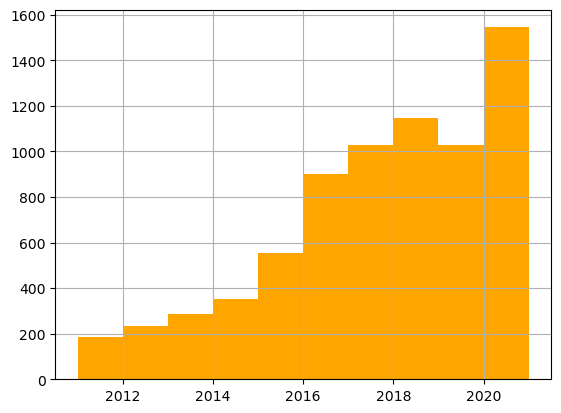

In [198]:
data[data["release_year"] > 2010]["release_year"].hist(color = "orange");
print(data[data["release_year"] > 2010]["release_year"].value_counts())

In [113]:
data = data.drop(columns = ["show_id"]) # drop unused data columns
data['release_year'] = pd.to_datetime(data['release_year'])

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   country       8790 non-null   object        
 4   date_added    8790 non-null   object        
 5   release_year  8790 non-null   datetime64[ns]
 6   rating        8790 non-null   object        
 7   duration      8790 non-null   object        
 8   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 618.2+ KB


# Distribution of data feaures 
### Univariate Visualization

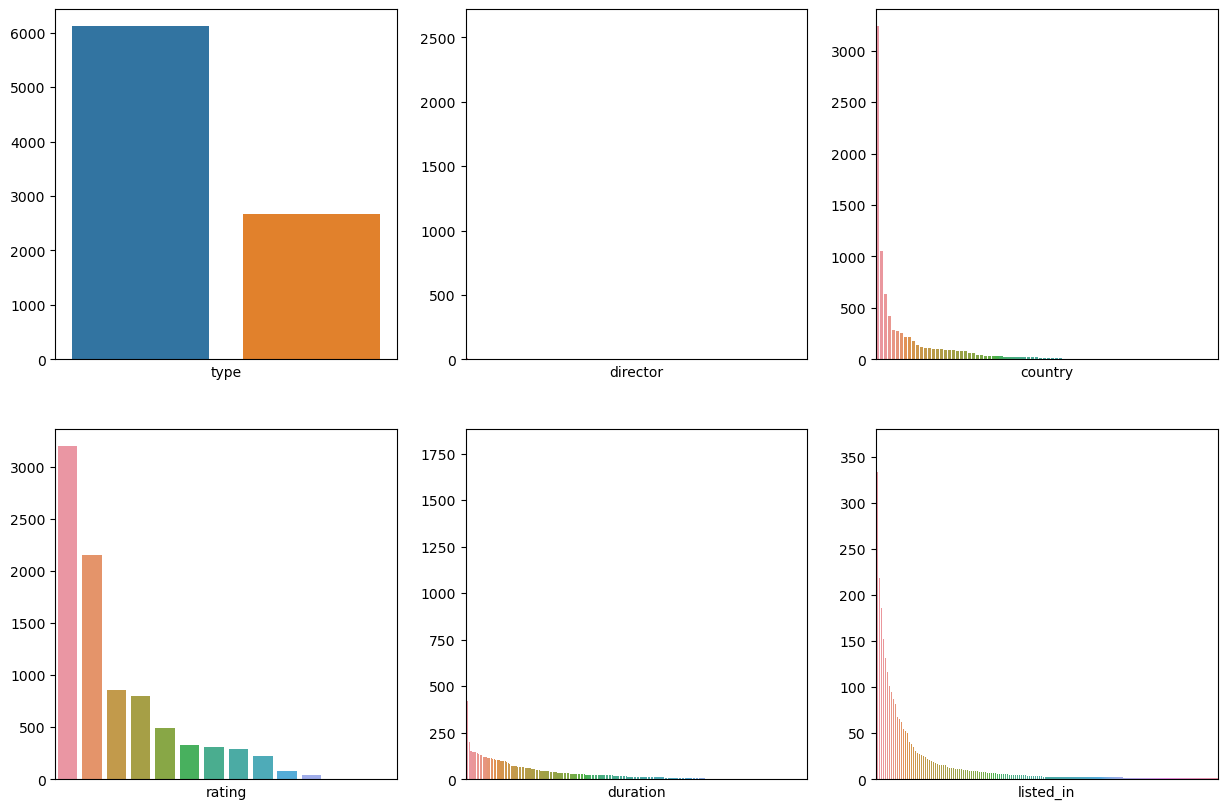

In [115]:
col = ["type", "director", "country", "rating", "duration", "listed_in"]
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=data[col[i]].value_counts().index, 
                y=data[col[i]].value_counts().values)
    plt.xlabel(col[i])
    plt.xticks([])

plt.show()

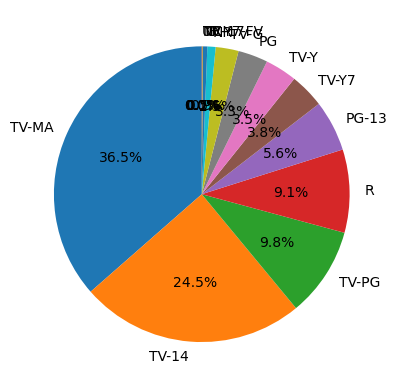

In [116]:
plt.pie(data["rating"].value_counts().values, labels=data["rating"].value_counts().index, textprops=dict(color="black"), startangle=90, autopct='%1.1f%%');

## Sheet 4. Top Directors

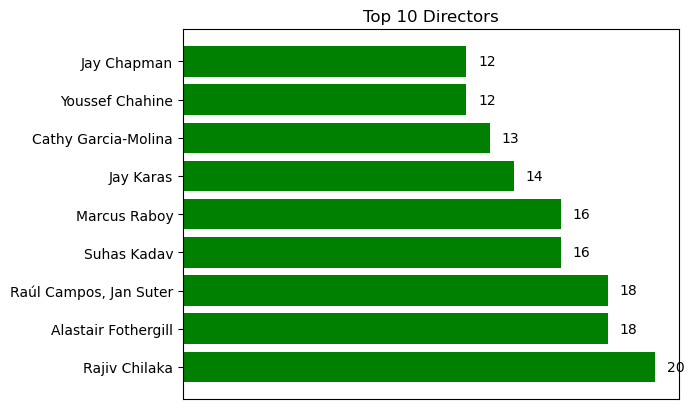

In [195]:
directors = data["director"].value_counts().reset_index(name = 'count').sort_values(by = "count", ascending = False)[1:10]
bars = plt.barh(directors["index"], directors["count"], color = "green")

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}',
             va='center', ha='left')

handles = [plt.Rectangle((0,0),1,1)]
plt.xticks(rotation = 90)
plt.xticks([])
plt.title("Top 10 Directors");

## Sheet 5. Top Genres

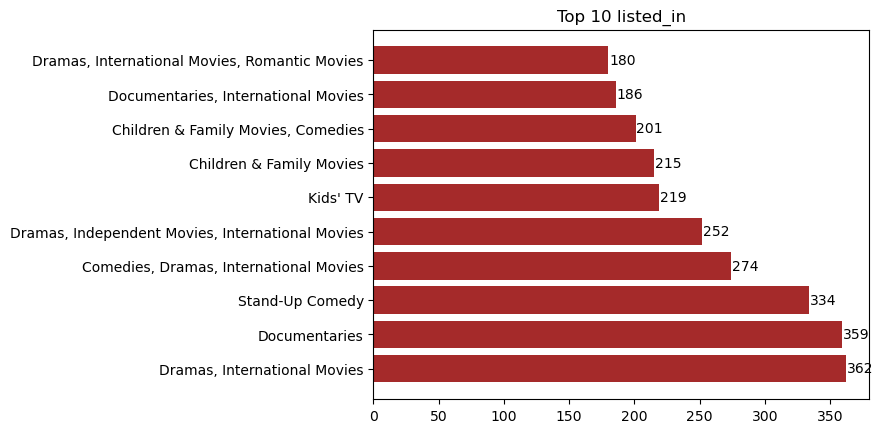

In [193]:
# listed_in
listed_in = data["listed_in"].value_counts().reset_index(name = 'count').sort_values(by = "count", ascending = False)[:10]
bars = plt.barh(listed_in["index"], listed_in["count"], color = "brown")

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}',
             va='center', ha='left')

handles = [plt.Rectangle((0,0),1,1)]
plt.title("Top 10 listed_in");

## Sheet 6. Top Ratings

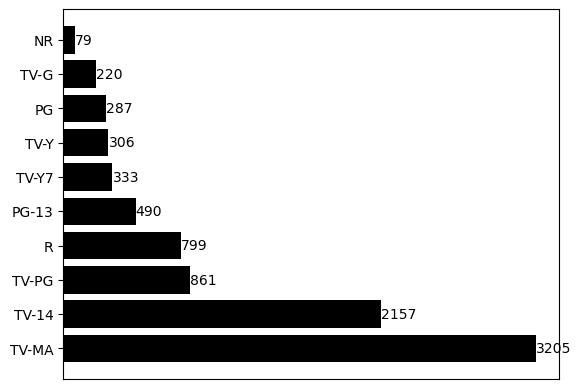

In [192]:
# rating
rating = data["rating"].value_counts().reset_index(name = 'count').sort_values(by = "count", ascending = False)[:10]
bars = plt.barh(rating["index"], rating["count"], color = "black")
plt.xticks([])

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}',
             va='center', ha='left')

handles = [plt.Rectangle((0,0),1,1)]

## Sheet 7. Oldest Contents on Netflix by Content Release year

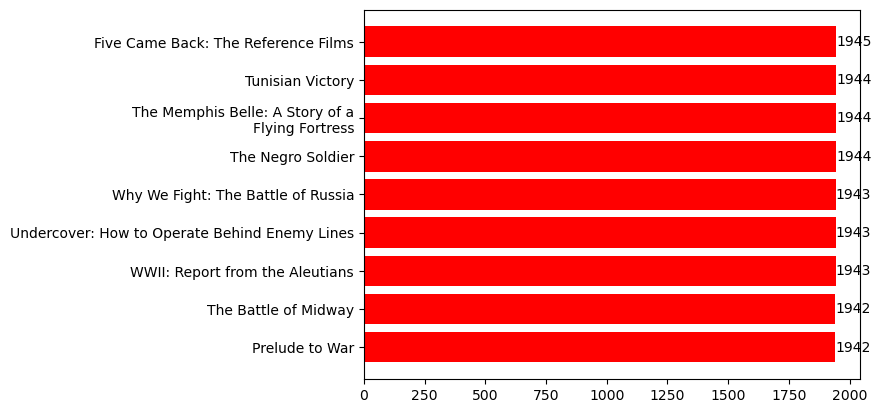

In [229]:
subdata = data[["release_year", "title"]]
bars = plt.barh(subdata.sort_values(by = "release_year")[1: 10]["title"], subdata.sort_values(by = "release_year")[1: 10]["release_year"], color = 'red')
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}',
             va='center', ha='left')

## Sheet 8. Content Types over the Years

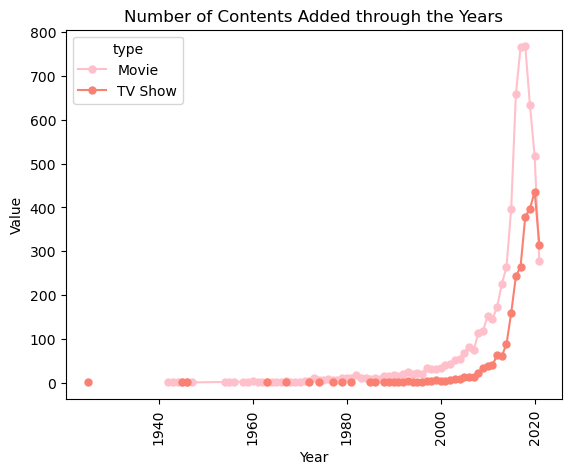

In [206]:
sh8 = data.groupby(["release_year", "type"]).size().unstack()
sh8.plot(kind = "line", color = ["pink", "salmon"], marker = 'o', markersize = 5)
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.ylabel('Value')
plt.title("Number of Contents Added through the Years")
plt.show()

## Sheet 9. Release Years with Highest Contents

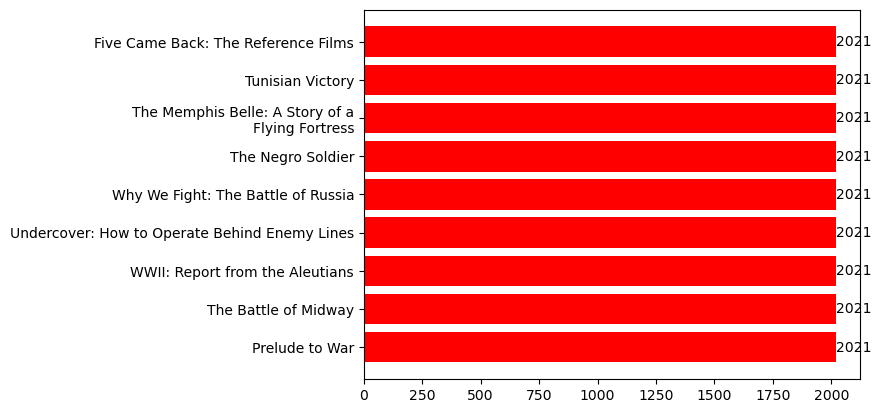

In [231]:
subdata2 = data[["release_year", "title"]]
bars = plt.barh(subdata2.sort_values(by = "release_year")[1: 10]["title"], subdata2.sort_values(by = "release_year", ascending = False)[1: 10]["release_year"], color = 'red')
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}',
             va='center', ha='left')

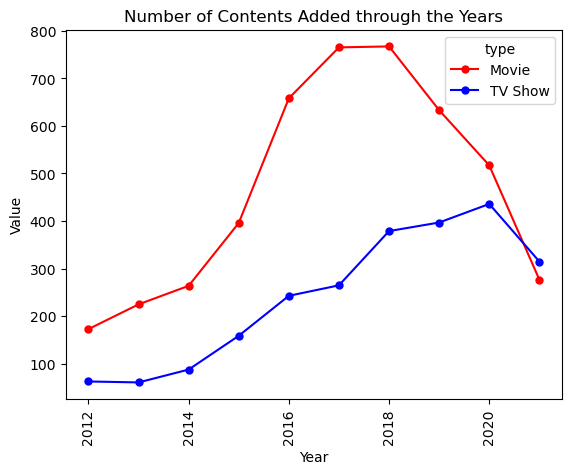

In [236]:
sh9 = data.groupby(["release_year", "type"]).size().unstack().sort_values(by = "release_year", ascending = False)[:10]
sh9.plot(kind = "line", color = ["red", "blue"], marker = 'o', markersize = 5)
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.ylabel('Value')
plt.title("Number of Contents Added through the Years")
plt.show()